第一个NeuralNetwork模块，用的是线性回归

https://youtu.be/Z_ikDlimN6A?t=17920

[Gradient descent, how neural networks learn | Chapter 2, Deep learning](https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2&ab_channel=3Blue1Brown)

[5分钟深度学习 #02 反向传播算法](https://www.bilibili.com/video/BV1yG411x7Cc/?spm_id_from=333.788&vd_source=4b31946931a7c038ee64bc9619104ec0)

In [16]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    
    # forward propagation
    def forward(self, x):
        return self.weight * x + self.bias

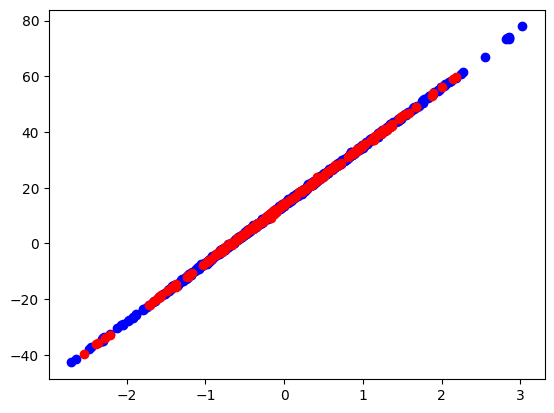

In [17]:
import matplotlib.pyplot as plt

# set hyperparameters
w = 21
b = 14
num_data = 1000
noise = 0.3

# get linear regression data, y = wx + b + noise
x = torch.randn(num_data)
y = w * x + b + noise * torch.randn(num_data)

x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

# show data
plt.scatter(x_train, y_train, c='b', label='train')
plt.scatter(x_test, y_test, c='r', label='test')

In [18]:
# set a seed for reproducibility
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

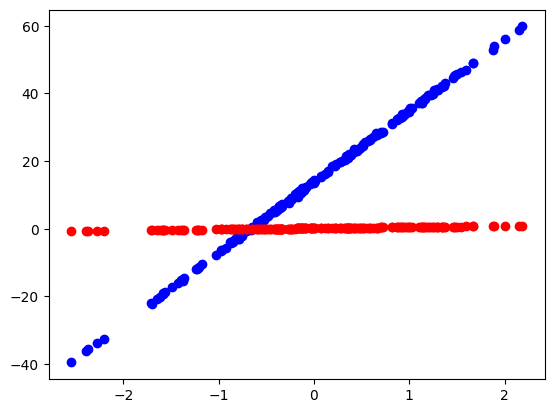

In [19]:
# predict with random parameters
with torch.inference_mode():
    y_predict = model_0(x_test)

# show prediction
plt.scatter(x_test, y_test, c='b', label='test')
plt.scatter(x_test, y_predict, c='r', label='predict')

# 这时候模型参数是随机的，所以预测的结果是随机的。预测效果不好。

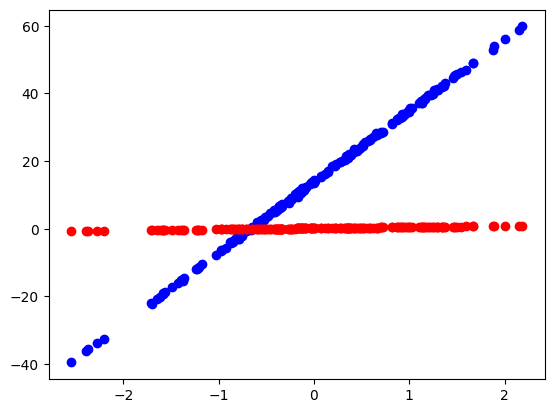

In [20]:
# predict with random parameters
with torch.no_grad():
    y_predict = model_0(x_test)

# show prediction
plt.scatter(x_test, y_test, c='b', label='test')
plt.scatter(x_test, y_predict, c='r', label='predict')


In [21]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [22]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

Epoch 0, loss 19.55769157409668
weight 0.3957858979701996, bias 0.1818094104528427
Epoch 100, loss 13.31019401550293
weight 6.436050891876221, bias 5.276809215545654
Epoch 200, loss 7.194120407104492
weight 12.82925033569336, bias 9.775306701660156
Epoch 300, loss 1.2371302843093872
weight 19.59049415588379, bias 13.479559898376465
Epoch 400, loss 0.2407323122024536
weight 20.994726181030273, bias 13.975809097290039
Epoch 500, loss 0.24073226749897003
weight 20.994619369506836, bias 13.97555923461914
Epoch 600, loss 0.2407318651676178
weight 20.994497299194336, bias 13.97555923461914
Epoch 700, loss 0.24073198437690735
weight 20.994861602783203, bias 13.975809097290039
Epoch 800, loss 0.2407323271036148
weight 20.994739532470703, bias 13.975809097290039
Epoch 900, loss 0.24073241651058197
weight 20.994617462158203, bias 13.975809097290039


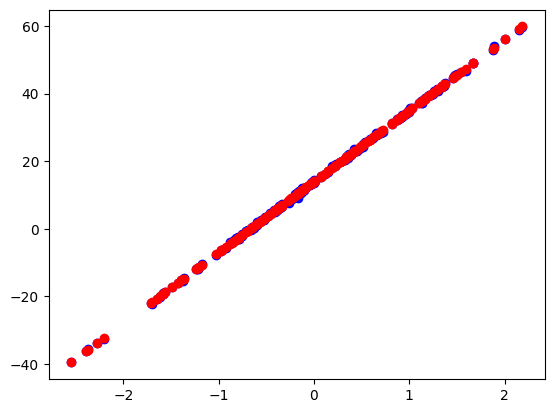

In [23]:
# begin to train
for epoch in range(1000):
    # forward propagation
    y_predict = model_0(x_train)

    # calculate loss
    loss = loss_fn(y_predict, y_train)

    # backward propagation
    loss.backward()

    # update parameters
    optimizer.step()

    # clear gradients
    optimizer.zero_grad()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss {loss.item()}')
        print(f'weight {model_0.weight.item()}, bias {model_0.bias.item()}')

# predict with trained parameters
with torch.no_grad():
    y_predict = model_0(x_test)

# show prediction
plt.scatter(x_test, y_test, c='b', label='test')
plt.scatter(x_test, y_predict, c='r', label='predict')

## Save the model

OrderedDict([('weight', tensor([20.9949])), ('bias', tensor([13.9758]))])


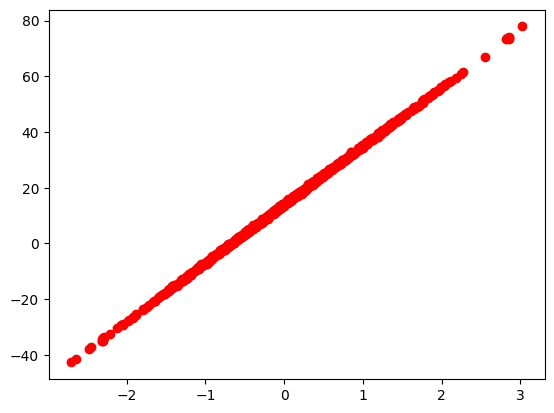

In [25]:
# save the model
torch.save(model_0.state_dict(), '02model.ckpt')

# load the model
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load('02model.ckpt'))
model_1.eval()

print(model_1.state_dict())

# test the model
y_pred = model_1(x_test)

# plot the result
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')